#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u>Análisis de Componentes Principales (PCA)</u>**
Principal Component Analysis (PCA)
---
---

In [57]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Importación de la librería "os" para manipular rutas de archivos.
# Ruta del directorio que se desea establecer como directorio de trabajo.
# Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
import os
DIR = "/content/drive/MyDrive/Ciencia_Analitica_Datos"
os.chdir(DIR)

In [59]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import OneHotEncoder

In [60]:
# Carga de archivo CSV.
cereals_df = pd.read_csv('Cereals.csv')
# DataFrame
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y Preprocesamiento

In [61]:
# Información del dataset.
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


1. Se obtienen las estadísticas descriptivas para todas las variables del dataframe.

In [62]:
# Estadísticas descriptivas variables cunatitativas.
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [63]:
# Estadísticas descriptivas variable categóricas.
cereals_df.describe(include = 'object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


Se generan algunos gráficos para familiarizarse con el conjunto de datos. Se incluyen los que permiten responder los siguientes cuestionamientos:

**Nota.** Se debe de responder de manera explícita las preguntas, apoyándose de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

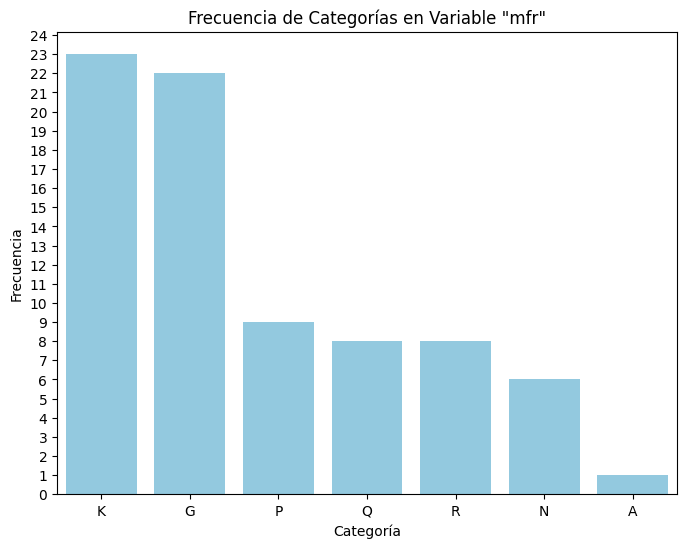

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64


In [64]:
# Frecuencia de cada categoría en la variable "mfr".
frecuencia_mfr = cereals_df['mfr'].value_counts()

# Configuración de gráfico.
plt.figure(figsize = (8, 6))
sns.barplot(x = frecuencia_mfr.index, y = frecuencia_mfr, color = 'skyblue')

# Etiquetas
plt.title('Frecuencia de Categorías en Variable "mfr"')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Ajuste de valores de ejes.
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(1))

# Mostrar gráfica.
plt.show()

# Resultados
print(frecuencia_mfr)

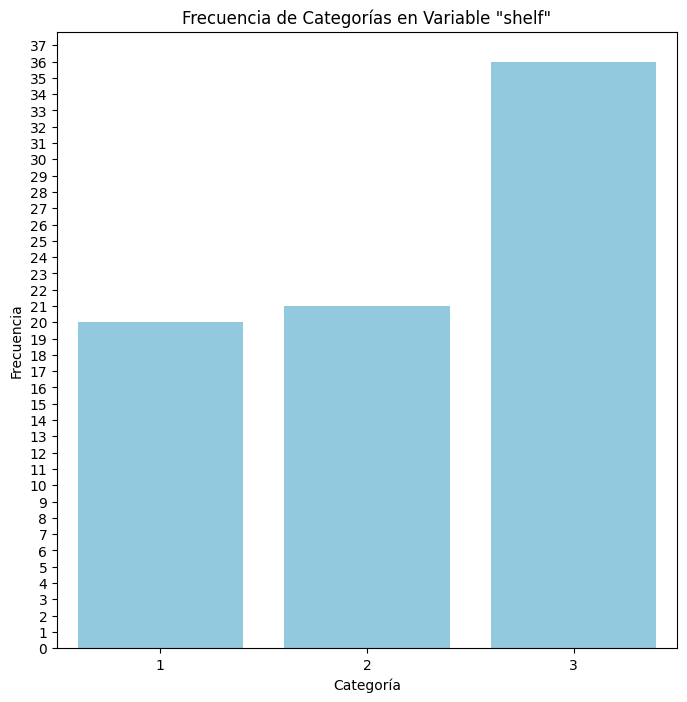

3    36
2    21
1    20
Name: shelf, dtype: int64


In [65]:
# Frecuencia de cada categoría en la variable "shelf".
frecuencia_shelf= cereals_df['shelf'].value_counts()

# Configuración de gráfico.
plt.figure(figsize = (8, 8))
sns.barplot(x = frecuencia_shelf.index, y = frecuencia_shelf, color = 'skyblue')

# Etiquetas
plt.title('Frecuencia de Categorías en Variable "shelf"')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Ajuste de valores de ejes.
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(1))

# Mostrar gráfica.
plt.show()

# Resultados
print(frecuencia_shelf)

2b) Se combinan los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [66]:
# Frecuencia de valores en 'mfr' para cada valor único en 'shelf'.
cereals_df[['mfr','shelf']].groupby('shelf').value_counts().to_frame()

0
shelf mfr    
1     G     6
      K     4
      R     4
      N     3
      P     2
      Q     1
2     K     7
      G     7
      Q     3
      N     2
      A     1
      P     1
3     K    12
      G     9
      P     6
      Q     4
      R     4
      N     1

<Axes: title={'center': 'Cantidad de Productos de Fabricante por Estante'}, xlabel='Fabricante', ylabel='Frecuencia'>

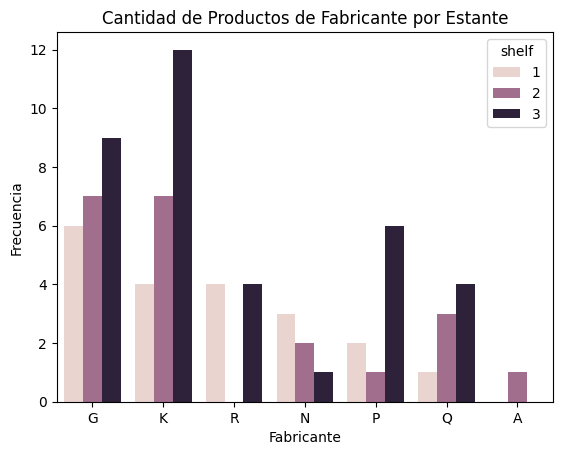

In [67]:
# Frecuencia de valores de 'mfr' agrupados por 'shelf'.
frecuencia = cereals_df[['mfr', 'shelf']].groupby('shelf')['mfr'].value_counts().to_frame()

# Renombrar la columna de frecuencia de mfr.
frecuencia.rename(columns = {'mfr': 'mfr_count'}, inplace = True)

# Etiquetas y título.
plt.xlabel('Fabricante')
plt.ylabel('Frecuencia')
plt.title('Cantidad de Productos de Fabricante por Estante')

sns.barplot(data = frecuencia.reset_index(), x = "mfr", y = "mfr_count", hue = "shelf")

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

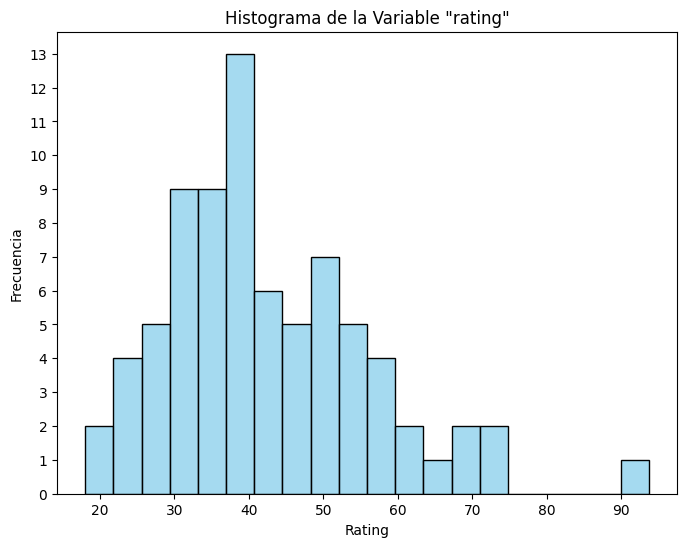


Rango más frecuente de la variable Rating:  40.400208


In [68]:
# Histograma variable "rating".
plt.figure(figsize = (8, 6))
sns.histplot(data = cereals_df, x = 'rating', bins = 20, color = 'skyblue')

# Etiquetas
plt.title('Histograma de la Variable "rating"')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

# Ajuste de valores de ejes.
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(1))

# Mostrar gráfica.
plt.show()

# Mostrar resultados.
print("\nRango más frecuente de la variable Rating: ", cereals_df['rating'].median())

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [69]:
# Diez cereales mejor evaluados.
cereals_df[['mfr','name','rating']].groupby(['mfr','name']).mean().sort_values(by = 'rating', axis = 0, ascending = False)[:10]

rating
mfr name                                
K   All-Bran_with_Extra_Fiber  93.704912
N   Shredded_Wheat_'n'Bran     74.472949
    Shredded_Wheat_spoon_size  72.801787
    100%_Bran                  68.402973
    Shredded_Wheat             68.235885
    Cream_of_Wheat_(Quick)     64.533816
Q   Puffed_Wheat               63.005645
    Puffed_Rice                60.756112
K   Nutri-grain_Wheat          59.642837
    All-Bran                   59.425505

<Axes: title={'center': 'Top 10 Cereals by Rating'}, xlabel='Cereal Name', ylabel='Rating'>

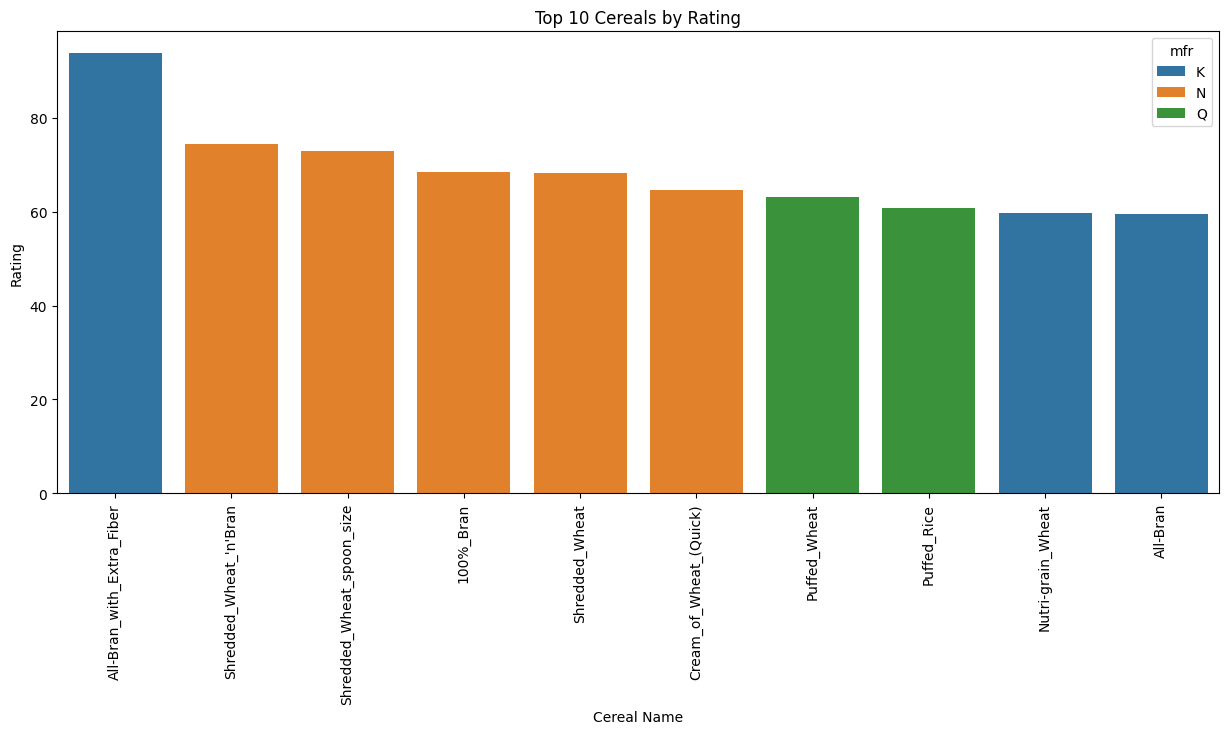

In [70]:
# Diez cereales mejor evaluados.
mejor_evaluados = cereals_df[['mfr', 'name', 'rating']].groupby(['mfr', 'name']).mean().sort_values(by='rating', ascending = False)[:10]

# Gráfica de barras.
plt.figure(figsize = (15, 6))
#plt.barh(mejor_evaluados.index.get_level_values('name'), mejor_evaluados['rating'], color = 'skyblue')

# Etiquetas y título.
plt.ylabel('Rating')
plt.xlabel('Cereal Name')
plt.title('Top 10 Cereals by Rating')

# Ajuste de valores de ejes.
plt.xticks(rotation = 90)

# Mostrar gráfica.
sns.barplot(mejor_evaluados, x = 'name', y = "rating", hue = 'mfr')
#plt.show()

4a) Se compara la distribución de las calorías según el fabricante, por medio de boxplots.

<Axes: xlabel='mfr', ylabel='calories'>

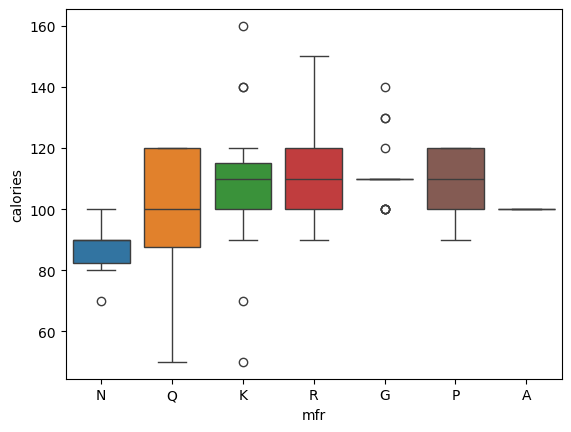

In [71]:
# Boxplot para compara distribución de las calorías según el fabricante.
sns.boxplot(data = cereals_df, x = 'mfr', y = 'calories', hue = 'mfr')

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

<Axes: >

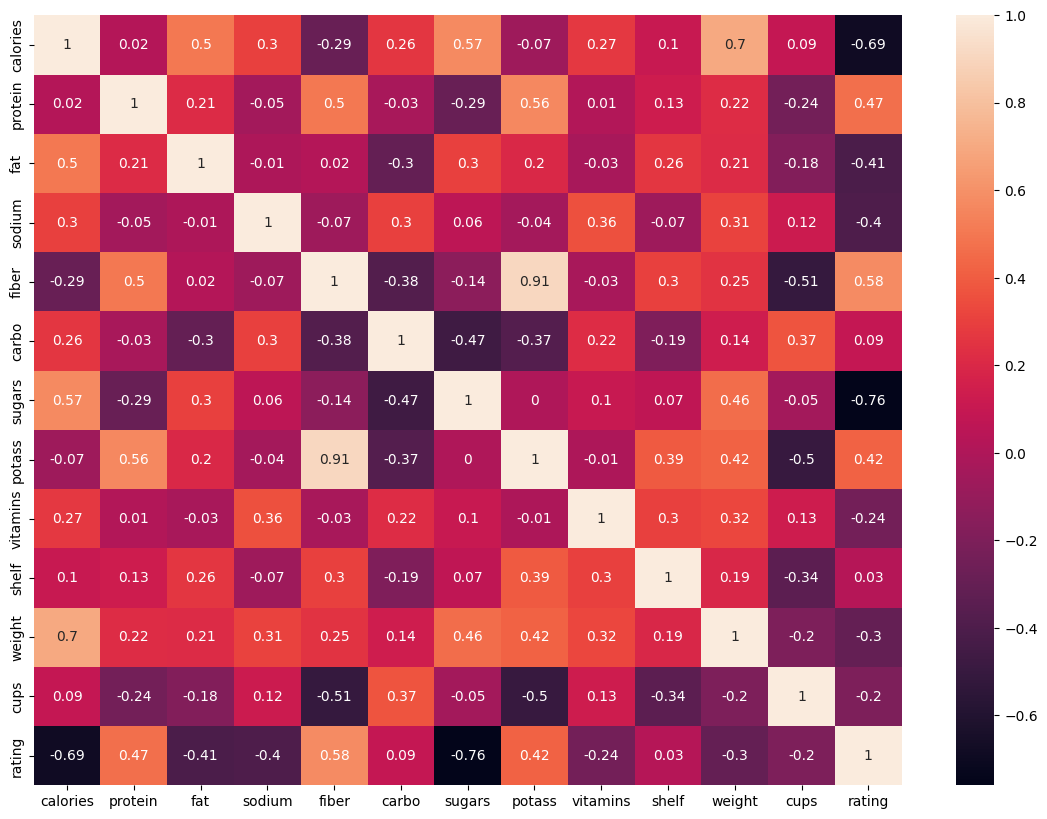

In [72]:
# Heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(round(cereals_df.corr(numeric_only = True),2), annot = True)

In [73]:
# Matriz de correlación.
correlation_matrix = cereals_df.corr(numeric_only = True)

# Dos variables con correlaciones más altas con "rating".
correlation_with_rating = correlation_matrix['rating'].sort_values(ascending = False)
# Excluir propia correlación de "rating".
top_correlations = correlation_with_rating[1:3]

# Mostrar resultados:
print("Las dos variables con mayor correlación con 'rating' son:")
print(top_correlations)

Las dos variables con mayor correlación con 'rating' son:
fiber      0.584160
protein    0.470618
Name: rating, dtype: float64


5. Se elimina todos los registros con algún dato faltante y se reinicia el índice del dataframe para que quede con valores consecutivos.

In [74]:
# Datos faltantes por columna.
cereals_df.isna().mean()

name        0.000000
mfr         0.000000
type        0.000000
calories    0.000000
protein     0.000000
fat         0.000000
sodium      0.000000
fiber       0.000000
carbo       0.012987
sugars      0.012987
potass      0.025974
vitamins    0.000000
shelf       0.000000
weight      0.000000
cups        0.000000
rating      0.000000
dtype: float64

In [75]:
# Eliminar columnas con valores faltantes.
cereals_df.dropna(subset = ['carbo', 'sugars', 'potass'], inplace = True)

# Reiniciar índice del dataframe.
cereals_df.reset_index(drop = True, inplace = True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de Características

6. Considerando que `rating` es la variable de salida, se almacena en una variable `y`, y se separan los predictores **numéricos** en `X`. Se escalan los valores de `X` y se aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [76]:
# Bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Variable de salida.
y = cereals_df['rating']
# Predictores numéricos.
x = cereals_df.select_dtypes(include = [np.number])
# Eliminar rating (variable de salida) de los predictores.
x = x.drop('rating', axis = 1)

# Escala de valores de 'x'.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = scaler.get_feature_names_out())

# PCA para proyectar los datos en un nuevo espacio de vectores.
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)

In [77]:
x

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50
4,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
69,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75
70,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00
71,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67
72,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00


In [78]:
y

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     29.509541
        ...    
69    39.106174
70    27.753301
71    49.787445
72    51.592193
73    36.187559
Name: rating, Length: 74, dtype: float64

In [79]:
x_scaled

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922
...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,-0.948852,-0.547081,-0.183083,0.948401,-0.202203,-0.305922
70,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.129883,-1.044254,-0.183083,-0.261628,-0.202203,0.761919
71,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,-0.948852,0.234189,-0.183083,-1.471657,-0.202203,-0.647631
72,-0.356533,0.455295,0.0,0.457800,0.342475,0.587348,-0.948852,0.163165,-0.183083,-1.471657,-0.202203,0.761919


In [80]:
x_projected

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,-0.247787,-0.124799,0.046331,0.238706,0.021342
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0.895201,-0.835394,-0.595071,0.069954,-0.089523
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0.182089,0.139267,0.090776,-0.488302,-0.035570
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0.865569,-0.682678,0.099300,0.708471,0.108198
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,-0.808361,-0.712896,-0.100511,0.093129,-0.076342
...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,0.690165,0.353600,-0.017534,-0.281347,0.108000
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,0.259556,-0.021133,-0.100748,0.107726,0.101983
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,-0.616101,-0.591177,0.112252,-0.107794,0.051736
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,0.009124,-0.604610,-0.008312,0.025462,0.027293


7. Se obtiene la curva del porcentaje de varianza acumulada y se determine el número mínimo de componentes principales que explique más del 90% de la varianza. Se imprime la información de dichos componentes.

Número mínimo de componentes para explicar el 90% de la varianza: 7
Porcentaje de varianza explicada acumulada por cada componente principal:
Componente 1: 0.2766
Componente 2: 0.4972
Componente 3: 0.6460
Componente 4: 0.7308
Componente 5: 0.8129
Componente 6: 0.8704
Componente 7: 0.9253
Componente 8: 0.9600
Componente 9: 0.9862
Componente 10: 0.9938
Componente 11: 0.9985
Componente 12: 1.0000


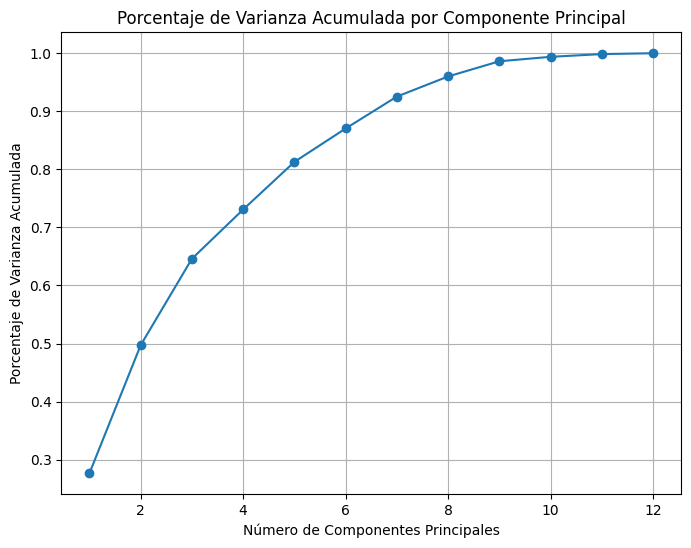

In [81]:
# Porcentaje de varianza explicada acumulada.
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Número mínimo de componentes que explique más del 90% de la varianza.
num_components_90 = np.argmax(explained_variance_ratio_cumulative >= 0.9) + 1

# Información de los componentes principales.
print(f"Número mínimo de componentes para explicar el 90% de la varianza: {num_components_90}")
print("Porcentaje de varianza explicada acumulada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio_cumulative):
    print(f"Componente {i + 1}: {ratio:.4f}")

# Curva del porcentaje de varianza acumulada.
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker = 'o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Porcentaje de Varianza Acumulada")
plt.title("Porcentaje de Varianza Acumulada por Componente Principal")
plt.grid(True)
plt.show()

In [82]:
# Valores Propios
print('Valores Propios:', list(np.round(pca.explained_variance_, decimals = 8)))

Valores Propios: [3.36484971, 2.68343251, 1.81049205, 1.0315095, 0.99776211, 0.69922773, 0.66888458, 0.42176628, 0.31802842, 0.09305466, 0.05706436, 0.01831167]


In [83]:
# Porcentaje Varianza
print ('Porcentaje Varianza:', pca.explained_variance_ratio_ * 100)

Porcentaje Varianza: [27.66148972 22.05974922 14.88354951  8.47975151  8.20232364  5.74815586
  5.49871329  3.46722281  2.61442284  0.76497634  0.46911013  0.15053512]


In [84]:
# Porcentaje Varianza Acumulada
print('Porcentaje Varianza Acumulada:', np.cumsum(pca.explained_variance_ratio_))

Porcentaje Varianza Acumulada: [0.2766149  0.49721239 0.64604788 0.7308454  0.81286864 0.87035019
 0.92533733 0.96000956 0.98615378 0.99380355 0.99849465 1.        ]


In [85]:
# Vectores Propios
print('Vectores Propios:')
print(pca.components_)

Vectores Propios:
[[ 3.65940581e-02  3.30887657e-01  2.12548775e-01 -5.08936595e-02
   4.58623301e-01 -2.68608955e-01  8.14399579e-02  5.02603054e-01
   1.88385579e-02  3.08929353e-01  2.57160143e-01 -3.71153758e-01]
 [-5.71142024e-01  4.53671747e-02 -2.49143226e-01 -3.04684185e-01
   2.01029311e-01 -1.75660427e-01 -3.64843914e-01  7.03449944e-02
  -3.00573874e-01 -6.51144332e-02 -4.48962056e-01 -1.06552657e-01]
 [-7.79270170e-02  3.26405299e-01 -2.91274339e-01  3.43107899e-01
   1.73911820e-01  5.13002361e-01 -4.95337842e-01  1.30459589e-01
   3.27562539e-01  5.45932482e-04  1.22029586e-01  8.26947954e-02]
 [-1.64031814e-01 -2.81264931e-01 -1.24324404e-01 -1.68915569e-01
  -7.52953200e-02 -7.13054808e-02  1.60328426e-02 -1.12708399e-01
   5.94798467e-01  6.67702679e-01 -1.60396224e-01 -3.06830647e-02]
 [ 1.86667486e-01  3.72133552e-01  5.97421856e-01 -2.92344384e-01
  -2.29653302e-01  1.91829845e-01 -3.60370715e-01 -1.24887983e-01
  -1.05581739e-01  2.65485477e-01 -2.32904827e-01  1.1

In [86]:
# Componentes a DataFrame
num_components = 12
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index = ['Principla component {}'.format(i) for i in range(1, num_components + 1)])

In [87]:
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principla component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principla component 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principla component 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
Principla component 4,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683
Principla component 5,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826
Principla component 6,0.196806,0.176822,0.299822,0.462005,0.084635,0.446257,0.061289,0.068499,0.279949,0.133268,0.316544,0.464295
Principla component 7,0.062276,0.260647,0.247778,0.608269,0.095668,0.026962,0.186843,0.147455,0.168034,0.124162,0.186826,0.593052
Principla component 8,0.004882,0.418610,0.054129,0.167525,0.218240,0.172049,0.067793,0.265667,0.460537,0.416013,0.076551,0.500321
Principla component 9,0.043225,0.518397,0.438048,0.247337,0.258082,0.135796,0.251199,0.186550,0.337770,0.415500,0.067996,0.045104
Principla component 10,0.495843,0.019565,0.147950,0.005456,0.292832,0.243900,0.247413,0.185987,0.051953,0.047086,0.692720,0.077575


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [88]:
# Valores de carga (loadings) para el primer componente principal (PC1).
loadings_pc1 = pca.components_[0]

# DataFrame para mostrar las variables y sus valores de carga.
loadings_df = pd.DataFrame({'Variable': x.columns, 'Loadings PC1': loadings_pc1})

# Orden de variables por valor absoluto de carga en PC1 de mayor a menor.
loadings_df = loadings_df.reindex(loadings_df['Loadings PC1'].abs().sort_values(ascending = False).index)

# Mostrar las tres variables más importantes en PC1.
top_3_variables_pc1 = loadings_df.head(3)
print("Las tres variables más importantes en el cálculo del primer componente principal (PC1) son:")
print(top_3_variables_pc1)

Las tres variables más importantes en el cálculo del primer componente principal (PC1) son:
   Variable  Loadings PC1
7    potass      0.502603
4     fiber      0.458623
11     cups     -0.371154


9. ¿Todas las variables categóricas son predictores? Se aplica una técnica de encoding a las que sí lo sonn.

No todas las variables categóricas son predictoras. Las variables categóricas predictoras son 'mfr' y 'type'. La técnica de encoding que se aplica es One-Hot Encoding, ya que esta técnica es adecuada para variables categóricas nominales (sin orden). Esta técnica crea una columna binaria (0 o 1) para cada categoría, lo que permite representar la variable categórica de forma numérica sin asignar ningún orden implícito entre las categorías.

In [89]:
cereals_df.describe(include = 'object').T

,count,unique,top,freq
name,74,74,100%_Bran,1
mfr,74,7,K,23
type,74,2,C,73


In [90]:
# OneHotEncoder
categorical_pred_variables = ['mfr', 'type']

encoder = OneHotEncoder(sparse_output = False, drop = 'first')
encoded_data_df = encoder.fit_transform(cereals_df[categorical_pred_variables])

# Nombres para nuevas columnas generadas.
encoded_columns_df = encoder.get_feature_names_out(categorical_pred_variables)

# Resultados en un nuevo DataFrame
categorical_pred_variables_encoded_df = pd.DataFrame(encoded_data_df, columns = encoded_columns_df)

In [91]:
categorical_pred_variables_encoded_df

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Se conjunta, en un dataframe, los valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Se almacena el dataframe resultante en archivo.

In [92]:
# Combinación de DataFrames en uno solo.

# Concatenar los DataFrames horizontalmente.
combined_df = pd.concat([x_projected, categorical_pred_variables_encoded_df, y], axis = 1)

# Almacena el DataFrame resultante en un archivo CSV.
combined_df.to_csv('combined_data.csv', index = False)

# Resultado.
combined_df

,0,1,2,3,4,5,6,7,8,9,10,11,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,rating
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,-0.247787,-0.124799,0.046331,0.238706,0.021342,0.0,0.0,1.0,0.0,0.0,0.0,0.0,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0.895201,-0.835394,-0.595071,0.069954,-0.089523,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0.182089,0.139267,0.090776,-0.488302,-0.035570,0.0,1.0,0.0,0.0,0.0,0.0,0.0,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0.865569,-0.682678,0.099300,0.708471,0.108198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,-0.808361,-0.712896,-0.100511,0.093129,-0.076342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,0.690165,0.353600,-0.017534,-0.281347,0.108000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,0.259556,-0.021133,-0.100748,0.107726,0.101983,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,-0.616101,-0.591177,0.112252,-0.107794,0.051736,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,0.009124,-0.604610,-0.008312,0.025462,0.027293,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193
